In [1]:
#import libraries
import pandas

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import numpy as np

In [3]:
#import data
try:
    csv_file=r"C:\Users\HexagonRig 2\Documents\GitHub\MLWithPython\Sample Data\resale-prices-processed.csv"
    raw_dataframe = pandas.read_csv(csv_file)

    print("Dataframe: ")
    print(raw_dataframe)
except:
    print("Error occured")

Dataframe: 
         month        town         flat_type block        street_name  \
0      2017-01  ANG MO KIO            2 ROOM   406  ANG MO KIO AVE 10   
1      2017-01  ANG MO KIO            3 ROOM   108   ANG MO KIO AVE 4   
2      2017-01  ANG MO KIO            3 ROOM   602   ANG MO KIO AVE 5   
3      2017-01  ANG MO KIO            3 ROOM   465  ANG MO KIO AVE 10   
4      2017-01  ANG MO KIO            3 ROOM   601   ANG MO KIO AVE 5   
...        ...         ...               ...   ...                ...   
85124  2020-11      YISHUN         EXECUTIVE   277       YISHUN ST 22   
85125  2020-11      YISHUN         EXECUTIVE   606       YISHUN ST 61   
85126  2020-11      YISHUN         EXECUTIVE   877       YISHUN ST 81   
85127  2020-11      YISHUN         EXECUTIVE   828       YISHUN ST 81   
85128  2020-11      YISHUN  MULTI-GENERATION   632       YISHUN ST 61   

      storey_range  floor_area_sqm        flat_model  lease_commence_date  \
0         10 TO 12            44.0

In [4]:
# Data preprocessing
raw_dataframe.town = pandas.factorize(raw_dataframe.town)[0]
raw_dataframe.flat_type = pandas.factorize(raw_dataframe.flat_type)[0]
raw_dataframe.flat_model = pandas.factorize(raw_dataframe.flat_model)[0]
print(raw_dataframe)

         month  town  flat_type block        street_name storey_range  \
0      2017-01     0          0   406  ANG MO KIO AVE 10     10 TO 12   
1      2017-01     0          1   108   ANG MO KIO AVE 4     01 TO 03   
2      2017-01     0          1   602   ANG MO KIO AVE 5     01 TO 03   
3      2017-01     0          1   465  ANG MO KIO AVE 10     04 TO 06   
4      2017-01     0          1   601   ANG MO KIO AVE 5     01 TO 03   
...        ...   ...        ...   ...                ...          ...   
85124  2020-11    25          4   277       YISHUN ST 22     04 TO 06   
85125  2020-11    25          4   606       YISHUN ST 61     04 TO 06   
85126  2020-11    25          4   877       YISHUN ST 81     01 TO 03   
85127  2020-11    25          4   828       YISHUN ST 81     07 TO 09   
85128  2020-11    25          6   632       YISHUN ST 61     07 TO 09   

       floor_area_sqm  flat_model  lease_commence_date     remaining_lease  \
0                44.0           0            

         month  town  flat_type block        street_name storey_range  \
0      2017-01     0          0   406  ANG MO KIO AVE 10     10 TO 12   
1      2017-01     0          1   108   ANG MO KIO AVE 4     01 TO 03   
2      2017-01     0          1   602   ANG MO KIO AVE 5     01 TO 03   
3      2017-01     0          1   465  ANG MO KIO AVE 10     04 TO 06   
4      2017-01     0          1   601   ANG MO KIO AVE 5     01 TO 03   
...        ...   ...        ...   ...                ...          ...   
85124  2020-11    25          4   277       YISHUN ST 22     04 TO 06   
85125  2020-11    25          4   606       YISHUN ST 61     04 TO 06   
85126  2020-11    25          4   877       YISHUN ST 81     01 TO 03   
85127  2020-11    25          4   828       YISHUN ST 81     07 TO 09   
85128  2020-11    25          6   632       YISHUN ST 61     07 TO 09   

       floor_area_sqm  flat_model  lease_commence_date     remaining_lease  \
0                44.0           0            

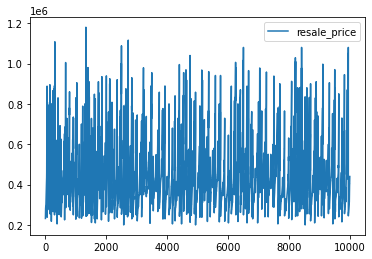

In [5]:
#Observing the relationship between dependent variable and time
#custom range
custom_range_start = 0    
custom_range_stop = 9999

dependent_variable = ['resale_price'] 
dependent_dataset = raw_dataframe[dependent_variable]

dependent_dataset.head(-1)[custom_range_start:custom_range_stop].plot() #modify this value to adjust number of rows returned
print(raw_dataframe)

In [6]:
# Refine extraction range use 0 and -1 to extract entire range
index_start = 0
index_stop = 2271

independent_variables = ['town','flat_type','floor_area_sqm','flat_model','lease_commence_date'] #input any number of variables
dependent_variable = ['resale_price'] #only input one variable

independent_dataset = raw_dataframe[independent_variables][index_start:index_stop]
dependent_dataset = raw_dataframe[dependent_variable][index_start:index_stop]

# Further splitting dataset into training and testing subsets
test_ratio=0.2 #splits the data into testing and training sets with ratio 0.2
indp_train_set, indp_test_set, dep_train_set, dep_test_set = train_test_split(independent_dataset, 
                                                                              dependent_dataset, 
                                                                              test_size=test_ratio)

print(indp_train_set) #outputs the generated test set

      town  flat_type  floor_area_sqm  flat_model  lease_commence_date
1630    12          3           121.0           0                 1983
682     16          2           113.0           6                 1989
1628    12          2            90.0          13                 1998
2169    24          3           114.0           7                 2003
1865    19          2            91.0           6                 2001
...    ...        ...             ...         ...                  ...
824     20          2            85.0          13                 2000
104      1          2            98.0           1                 1982
1641    13          1            65.0           0                 1976
2237    25          2            92.0           6                 2012
1466     8          3           122.0           0                 1993

[1816 rows x 5 columns]


In [7]:
print(independent_dataset)
print(dependent_dataset)

      town  flat_type  floor_area_sqm  flat_model  lease_commence_date
0        0          0            44.0           0                 1979
1        0          1            67.0           1                 1978
2        0          1            67.0           1                 1980
3        0          1            68.0           1                 1980
4        0          1            67.0           1                 1980
...    ...        ...             ...         ...                  ...
2266    25          4           141.0           4                 1987
2267    25          4           142.0           4                 1988
2268    25          4           146.0          10                 1987
2269    25          4           146.0          10                 1988
2270     0          0            44.0           0                 1980

[2271 rows x 5 columns]
      resale_price
0         232000.0
1         250000.0
2         262000.0
3         265000.0
4         265000.0
...      

In [8]:
# Create regression object and train model
linear_model = LinearRegression()
linear_model.fit(indp_train_set, dep_train_set)
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Coefficients: [[-3828.71385638 53078.12442925  1787.62154424  -327.56027885
   1960.98616655]]
Intercept: [-3700345.58032897]


In [9]:
# Generate predictions
linear_predictions = linear_model.predict(indp_test_set)
linear_predictions

array([[285773.82939996],
       [509361.62797335],
       [400859.25831091],
       [453926.53881178],
       [454860.48957558],
       [544722.4557989 ],
       [324218.42006495],
       [272963.67157714],
       [455714.16035602],
       [437861.48938601],
       [510118.61225955],
       [467373.66654747],
       [311037.91542832],
       [282317.97561274],
       [467093.89111727],
       [570445.72659078],
       [382098.83994559],
       [467267.25573959],
       [489358.97108992],
       [608016.11151307],
       [506714.91882756],
       [448774.9277636 ],
       [356285.59293309],
       [509361.62797335],
       [354465.47851911],
       [355094.74338388],
       [240088.30155664],
       [572406.71275733],
       [284330.17691042],
       [450884.54192141],
       [417725.96618824],
       [516001.39692144],
       [562092.42560941],
       [453592.9618983 ],
       [536998.07427171],
       [417706.62338469],
       [402330.83077938],
       [353073.66170286],
       [4850

In [11]:
# Compare predictions
print("Model score: ", linear_model.score(indp_test_set, dep_test_set))

Model score:  0.4388370262532537


In [ ]:
# Custom predicitons 
linear_model.predict( [['<variable0>','<variable1>']] ) #adjust depending on number of inputs 